In [1]:
import pandas as pd

file = 'sra_summary_PRJNA594535.csv'

df = pd.read_csv(file)
df

,Experiment Accession,Experiment Title,Organism Name,Instrument,Submitter,Study Accession,Study Title,Sample Accession,Sample Title,"Total Size, Mb",Total RUNs,Total Spots,Total Bases,Library Name,Library Strategy,Library Source,Library Selection
0,SRX7294679,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5787979,NaN,18.63,1,86291,36242220,CTRL_1,AMPLICON,METAGENOMIC,PCR
1,SRX7294680,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5787980,NaN,15.71,1,71248,29924160,CTRL_2,AMPLICON,METAGENOMIC,PCR
2,SRX7294681,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5787981,NaN,20.05,1,95361,40051620,D4_21,AMPLICON,METAGENOMIC,PCR
3,SRX7294682,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5787982,NaN,16.02,1,70947,29797740,D4-INU_22,AMPLICON,METAGENOMIC,PCR
4,SRX7294683,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5787983,NaN,19.25,1,90375,37957500,D4-INU_23,AMPLICON,METAGENOMIC,PCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SRX7294745,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5788045,NaN,19.18,1,86615,36378300,D2_H_M0,AMPLICON,METAGENOMIC,PCR
67,SRX7294746,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5788046,NaN,15.54,1,72063,30266460,CTRL_15,AMPLICON,METAGENOMIC,PCR
68,SRX7294747,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5788047,NaN,17.32,1,77571,32579820,D3_H_M0,AMPLICON,METAGENOMIC,PCR
69,SRX7294748,16S rRNA seq of bacterial DNA from cecal content,metagenome,Illumina MiSeq,Universite catholique de Louvain,SRP235423,Gut microbiota composition in mice transplante...,SRS5788048,NaN,13.80,1,64303,27007260,D4_19,AMPLICON,METAGENOMIC,PCR


# Revisar que estén todos los datos

In [15]:
import re
import numpy as np

regex = r'_[0-9]+$'

clean_labels = df['Library Name'].apply(lambda x: re.sub(regex, '', x))
uniq_labels, counts = np.unique(clean_labels, return_counts=True)
for label, count in zip(uniq_labels, counts):
    print(f'{label}: {count}')

CTRL: 14
D1: 6
D1-INU: 6
D1_H_M0: 1
D2: 5
D2-INU: 6
D2_H_M0: 1
D3: 6
D3-INU: 6
D3_H_M0: 1
D4: 9
D4-INU: 9
D4_H_M0: 1


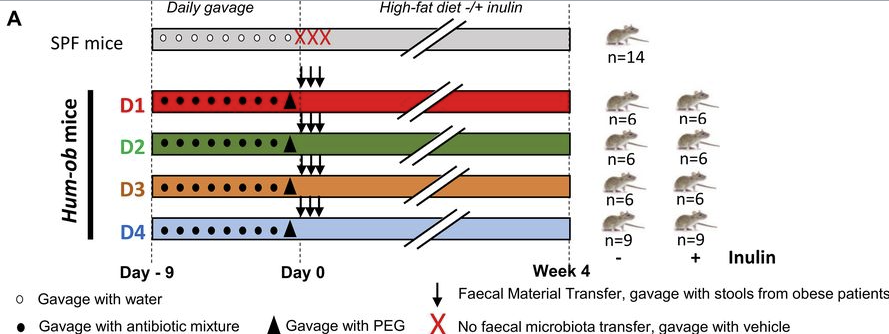

Se encuentra que están los datos completos descritos en el diseño experimental con ratones. Sin embargo, para los ratónes del grupo D2 hace falta uno de los 6 que debería haber del subgrupo sin inulina.

In [18]:
runinfo = 'sra_runinfo_PRJNA594535.csv'
run_df = pd.read_csv(runinfo)

In [21]:
sra_numbers = run_df['Run']

Descargar las secuencias con [SRA toolkit](https://github.com/ncbi/sra-tools/wiki/08.-prefetch-and-fasterq-dump)

In [32]:
import subprocess

RAW_DATA_FOLDER = "./PRJNA594535_raw_data"

for sra_number in sra_numbers:
    cmd = f'prefetch {sra_number} -O "{RAW_DATA_FOLDER}"'
    print(cmd)
    subprocess.run(cmd, shell=True)
    break

prefetch SRR10615525 -O "./PRJNA594535_raw_data"



2024-04-11T23:42:09 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-04-11T23:42:09 prefetch.2.11.3: 1) Downloading 'SRR10615525'...
2024-04-11T23:42:09 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-04-11T23:42:09 prefetch.2.11.3:  Downloading via HTTPS...
2024-04-11T23:42:24 prefetch.2.11.3:  HTTPS download succeed
2024-04-11T23:42:24 prefetch.2.11.3:  'SRR10615525' is valid
2024-04-11T23:42:24 prefetch.2.11.3: 1) 'SRR10615525' was downloaded successfully
2024-04-11T23:42:24 prefetch.2.11.3: 'SRR10615525' has 0 unresolved dependencies


In [33]:
import os

os.listdir('PRJNA594535_raw_data/SRR10615525')

['SRR10615525.sra']

In [35]:
for sra_id in sra_numbers:
    print ("Generating fastq for: " + sra_id)
    fastq_dump = f'fasterq-dump --outdir PRJNA594535_fastq ./PRJNA594535_raw_data/{sra_id}'
    print ("The command used was: " + fastq_dump)
    subprocess.call(fastq_dump, shell=True)
    break

Generating fastq for: SRR10615525
The command used was: fasterq-dump --outdir PRJNA594535_fastq ./PRJNA594535_raw_data/SRR10615525


spots read      : 81,700
reads read      : 163,400
reads written   : 163,400


## Quality filter of the readings

Utilizar [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/download.html#fastqc) para revisar la calidad de las lecturas

In [43]:
import os

READS_DIR = 'PRJNA594535_fastq'

files = ' '.join([f'{READS_DIR}/{file}' for file in os.listdir(READS_DIR)])

QUALITY_DIR = 'PRJNA594535_quality'

command = f'fastqc {files} -o {QUALITY_DIR} --extract'
print(command)

# Makedir if not exists
if not os.path.exists(QUALITY_DIR):
    os.makedirs(QUALITY_DIR)
# Run the command

subprocess.run(command, shell=True)

fastqc PRJNA594535_fastq/SRR10615525_1.fastq PRJNA594535_fastq/SRR10615525_2.fastq -o PRJNA594535_quality --extract
null
null


Started analysis of SRR10615525_1.fastq
Approx 5% complete for SRR10615525_1.fastq
Approx 10% complete for SRR10615525_1.fastq
Approx 15% complete for SRR10615525_1.fastq
Approx 20% complete for SRR10615525_1.fastq
Approx 25% complete for SRR10615525_1.fastq
Approx 30% complete for SRR10615525_1.fastq
Approx 35% complete for SRR10615525_1.fastq
Approx 40% complete for SRR10615525_1.fastq
Approx 45% complete for SRR10615525_1.fastq
Approx 50% complete for SRR10615525_1.fastq
Approx 55% complete for SRR10615525_1.fastq
Approx 60% complete for SRR10615525_1.fastq
Approx 65% complete for SRR10615525_1.fastq
Approx 70% complete for SRR10615525_1.fastq
Approx 75% complete for SRR10615525_1.fastq
Approx 80% complete for SRR10615525_1.fastq
Approx 85% complete for SRR10615525_1.fastq
Approx 90% complete for SRR10615525_1.fastq
Approx 95% complete for SRR10615525_1.fastq


Analysis complete for SRR10615525_1.fastq


Started analysis of SRR10615525_2.fastq
Approx 5% complete for SRR10615525_2.fastq
Approx 10% complete for SRR10615525_2.fastq
Approx 15% complete for SRR10615525_2.fastq
Approx 20% complete for SRR10615525_2.fastq
Approx 25% complete for SRR10615525_2.fastq
Approx 30% complete for SRR10615525_2.fastq
Approx 35% complete for SRR10615525_2.fastq
Approx 40% complete for SRR10615525_2.fastq
Approx 45% complete for SRR10615525_2.fastq
Approx 50% complete for SRR10615525_2.fastq
Approx 55% complete for SRR10615525_2.fastq
Approx 60% complete for SRR10615525_2.fastq
Approx 65% complete for SRR10615525_2.fastq
Approx 70% complete for SRR10615525_2.fastq
Approx 75% complete for SRR10615525_2.fastq
Approx 80% complete for SRR10615525_2.fastq
Approx 85% complete for SRR10615525_2.fastq
Approx 90% complete for SRR10615525_2.fastq
Approx 95% complete for SRR10615525_2.fastq


Analysis complete for SRR10615525_2.fastq


CompletedProcess(args='fastqc PRJNA594535_fastq/SRR10615525_1.fastq PRJNA594535_fastq/SRR10615525_2.fastq -o PRJNA594535_quality --extract', returncode=0)

## Comprobación de que las lecturas ya están recortadas

In [47]:
sequence_lenght = {
    'forward': [],
    'reverse': []
}

for file in os.listdir(QUALITY_DIR):
    if file.endswith('html'):
        continue

    forward_read = '_1_fastqc' in file
    
    length_parsed = False
    with open(f'{QUALITY_DIR}/{file}/fastqc_data.txt') as f:
        for line in f:
            if 'Sequence length' in line:
                sequence_lenght['forward' if forward_read else 'reverse'].append(int(line.split('\t')[1]))
                length_parsed = True

            if length_parsed:
                break

Text(0, 0.5, 'Count')

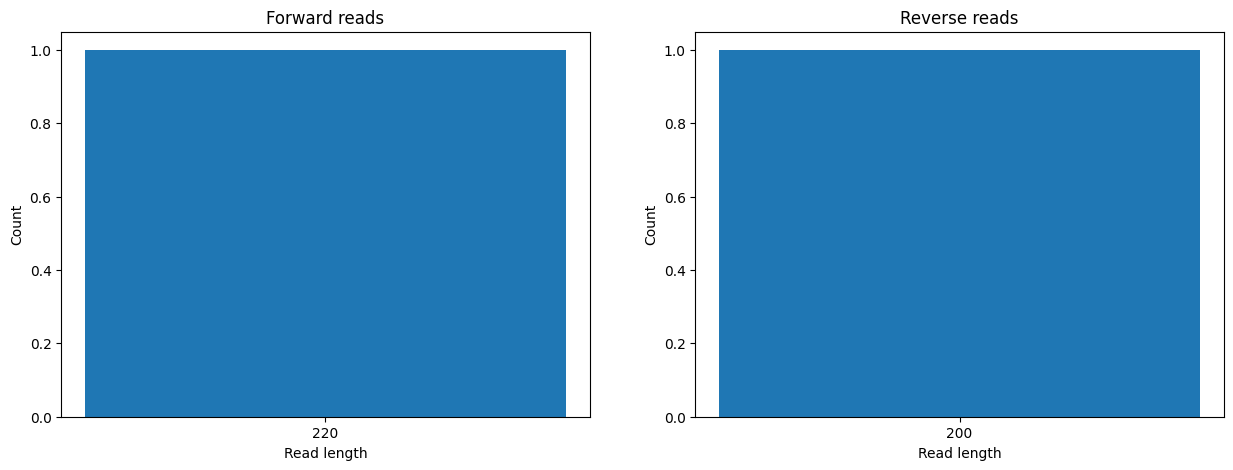

In [53]:
import matplotlib.pyplot as plt

uniq_sequence_lengths_forward, counts_forward = np.unique(sequence_lenght['forward'], return_counts=True)
uniq_sequence_lengths_reverse, counts_reverse = np.unique(sequence_lenght['reverse'], return_counts=True)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(uniq_sequence_lengths_forward, counts_forward)
ax[0].set_xticks(uniq_sequence_lengths_forward)
ax[0].set_title('Forward reads')
ax[0].set_xlabel('Read length')
ax[0].set_ylabel('Count')

ax[1].bar(uniq_sequence_lengths_reverse, counts_reverse)
ax[1].set_xticks(uniq_sequence_lengths_reverse)
ax[1].set_title('Reverse reads')
ax[1].set_xlabel('Read length')
ax[1].set_ylabel('Count')

## Merge pair reads and quality filter

Use [illumina-utils](https://github.com/merenlab/illumina-utils) to merge the paired reads

In [19]:
import pandas as pd

READS_DIR = 'PRJNA594535_fastq'

samples = np.unique([file.split('_')[0] for file in os.listdir(READS_DIR)])

reads = {
    'sample': samples,
    'r1': [f'{READS_DIR}/{sample}_1.fastq' for sample in samples],
    'r2': [f'{READS_DIR}/{sample}_2.fastq' for sample in samples]
}

df = pd.DataFrame(reads)
df.to_csv('PRJNA594535_reads.tsv', index=False, sep='\t')
df

,sample,r1,r2
0,SRR10615519,PRJNA594535_fastq/SRR10615519_1.fastq,PRJNA594535_fastq/SRR10615519_2.fastq
1,SRR10615520,PRJNA594535_fastq/SRR10615520_1.fastq,PRJNA594535_fastq/SRR10615520_2.fastq
2,SRR10615521,PRJNA594535_fastq/SRR10615521_1.fastq,PRJNA594535_fastq/SRR10615521_2.fastq
3,SRR10615522,PRJNA594535_fastq/SRR10615522_1.fastq,PRJNA594535_fastq/SRR10615522_2.fastq
4,SRR10615523,PRJNA594535_fastq/SRR10615523_1.fastq,PRJNA594535_fastq/SRR10615523_2.fastq
...,...,...,...
66,SRR10615585,PRJNA594535_fastq/SRR10615585_1.fastq,PRJNA594535_fastq/SRR10615585_2.fastq
67,SRR10615586,PRJNA594535_fastq/SRR10615586_1.fastq,PRJNA594535_fastq/SRR10615586_2.fastq
68,SRR10615587,PRJNA594535_fastq/SRR10615587_1.fastq,PRJNA594535_fastq/SRR10615587_2.fastq
69,SRR10615588,PRJNA594535_fastq/SRR10615588_1.fastq,PRJNA594535_fastq/SRR10615588_2.fastq


Generate the config files to run the merge command easily

In [20]:
import subprocess

# Create the output folder
OUTPUT_DIR = 'PRJNA594535_merged'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Create the config files
command = f'iu-gen-configs PRJNA594535_reads.tsv -o {OUTPUT_DIR}'
subprocess.run(command, shell=True)

Report .......................................: Read for 71 samples is read
Output directory set in configs ..............: /home/manuel/projects/biologia_computacional/proyecto/PRJNA594535_merged
Prefix for R1 ................................: None
Prefix for R2 ................................: None


CompletedProcess(args='iu-gen-configs PRJNA594535_reads.tsv -o PRJNA594535_merged', returncode=0)

Merge the pair reads

In [24]:
files = [file for file in os.listdir(OUTPUT_DIR) if file.endswith('.ini')]
total = len(files)

for i, config_file in enumerate(files):
    if config_file.endswith('.ini'):
        sample_name = config_file.split('.')[0]
        command = f'iu-merge-pairs {OUTPUT_DIR}/{config_file} -o {sample_name} -P 0.03 --enforce-Q30-check --ignore-deflines'
        print(f'Running {command} ({i + 1}/{total})')
        try:
            subprocess.run(command, shell=True)
        except Exception as e:
            print(f'Error processing {sample_name}: {e}')

Running iu-merge-pairs PRJNA594535_merged/SRR10615556.ini -o SRR10615556 -P 0.03 --enforce-Q30-check --ignore-deflines (1/71)


[Merging 1 of 1] (num pairs processed: 77,000) -- merged pairs: 45,265


Running iu-merge-pairs PRJNA594535_merged/SRR10615543.ini -o SRR10615543 -P 0.03 --enforce-Q30-check --ignore-deflines (2/71)


[Merging 1 of 1] (num pairs processed: 95,000) -- merged pairs: 56,587


Running iu-merge-pairs PRJNA594535_merged/SRR10615570.ini -o SRR10615570 -P 0.03 --enforce-Q30-check --ignore-deflines (3/71)


[Merging 1 of 1] (num pairs processed: 70,000) -- merged pairs: 40,771


Running iu-merge-pairs PRJNA594535_merged/SRR10615553.ini -o SRR10615553 -P 0.03 --enforce-Q30-check --ignore-deflines (4/71)


[Merging 1 of 1] (num pairs processed: 96,000) -- merged pairs: 57,831


Running iu-merge-pairs PRJNA594535_merged/SRR10615584.ini -o SRR10615584 -P 0.03 --enforce-Q30-check --ignore-deflines (5/71)


[Merging 1 of 1] (num pairs processed: 73,000) -- merged pairs: 44,129


Running iu-merge-pairs PRJNA594535_merged/SRR10615578.ini -o SRR10615578 -P 0.03 --enforce-Q30-check --ignore-deflines (6/71)


[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 52,533


Running iu-merge-pairs PRJNA594535_merged/SRR10615565.ini -o SRR10615565 -P 0.03 --enforce-Q30-check --ignore-deflines (7/71)


[Merging 1 of 1] (num pairs processed: 85,000) -- merged pairs: 50,737


Running iu-merge-pairs PRJNA594535_merged/SRR10615589.ini -o SRR10615589 -P 0.03 --enforce-Q30-check --ignore-deflines (8/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 51,964


Running iu-merge-pairs PRJNA594535_merged/SRR10615537.ini -o SRR10615537 -P 0.03 --enforce-Q30-check --ignore-deflines (9/71)


[Merging 1 of 1] (num pairs processed: 76,000) -- merged pairs: 45,986


Running iu-merge-pairs PRJNA594535_merged/SRR10615567.ini -o SRR10615567 -P 0.03 --enforce-Q30-check --ignore-deflines (10/71)


[Merging 1 of 1] (num pairs processed: 103,000) -- merged pairs: 61,964


Running iu-merge-pairs PRJNA594535_merged/SRR10615568.ini -o SRR10615568 -P 0.03 --enforce-Q30-check --ignore-deflines (11/71)


[Merging 1 of 1] (num pairs processed: 77,000) -- merged pairs: 45,097


Running iu-merge-pairs PRJNA594535_merged/SRR10615548.ini -o SRR10615548 -P 0.03 --enforce-Q30-check --ignore-deflines (12/71)


[Merging 1 of 1] (num pairs processed: 73,000) -- merged pairs: 43,314


Running iu-merge-pairs PRJNA594535_merged/SRR10615534.ini -o SRR10615534 -P 0.03 --enforce-Q30-check --ignore-deflines (13/71)


[Merging 1 of 1] (num pairs processed: 72,000) -- merged pairs: 43,728


Running iu-merge-pairs PRJNA594535_merged/SRR10615529.ini -o SRR10615529 -P 0.03 --enforce-Q30-check --ignore-deflines (14/71)


[Merging 1 of 1] (num pairs processed: 76,000) -- merged pairs: 45,947


Running iu-merge-pairs PRJNA594535_merged/SRR10615555.ini -o SRR10615555 -P 0.03 --enforce-Q30-check --ignore-deflines (15/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 50,304


Running iu-merge-pairs PRJNA594535_merged/SRR10615576.ini -o SRR10615576 -P 0.03 --enforce-Q30-check --ignore-deflines (16/71)


[Merging 1 of 1] (num pairs processed: 111,000) -- merged pairs: 67,427


Running iu-merge-pairs PRJNA594535_merged/SRR10615527.ini -o SRR10615527 -P 0.03 --enforce-Q30-check --ignore-deflines (17/71)


[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 52,552


Running iu-merge-pairs PRJNA594535_merged/SRR10615523.ini -o SRR10615523 -P 0.03 --enforce-Q30-check --ignore-deflines (18/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 50,234


Running iu-merge-pairs PRJNA594535_merged/SRR10615526.ini -o SRR10615526 -P 0.03 --enforce-Q30-check --ignore-deflines (19/71)


[Merging 1 of 1] (num pairs processed: 109,000) -- merged pairs: 65,434


Running iu-merge-pairs PRJNA594535_merged/SRR10615546.ini -o SRR10615546 -P 0.03 --enforce-Q30-check --ignore-deflines (20/71)


[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 53,141


Running iu-merge-pairs PRJNA594535_merged/SRR10615575.ini -o SRR10615575 -P 0.03 --enforce-Q30-check --ignore-deflines (21/71)


[Merging 1 of 1] (num pairs processed: 85,000) -- merged pairs: 50,950


Running iu-merge-pairs PRJNA594535_merged/SRR10615588.ini -o SRR10615588 -P 0.03 --enforce-Q30-check --ignore-deflines (22/71)


[Merging 1 of 1] (num pairs processed: 71,000) -- merged pairs: 41,735


Running iu-merge-pairs PRJNA594535_merged/SRR10615544.ini -o SRR10615544 -P 0.03 --enforce-Q30-check --ignore-deflines (23/71)


[Merging 1 of 1] (num pairs processed: 75,000) -- merged pairs: 44,167


Running iu-merge-pairs PRJNA594535_merged/SRR10615528.ini -o SRR10615528 -P 0.03 --enforce-Q30-check --ignore-deflines (24/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 51,773


Running iu-merge-pairs PRJNA594535_merged/SRR10615541.ini -o SRR10615541 -P 0.03 --enforce-Q30-check --ignore-deflines (25/71)


[Merging 1 of 1] (num pairs processed: 95,000) -- merged pairs: 58,084


Running iu-merge-pairs PRJNA594535_merged/SRR10615583.ini -o SRR10615583 -P 0.03 --enforce-Q30-check --ignore-deflines (26/71)


[Merging 1 of 1] (num pairs processed: 96,000) -- merged pairs: 59,251


Running iu-merge-pairs PRJNA594535_merged/SRR10615571.ini -o SRR10615571 -P 0.03 --enforce-Q30-check --ignore-deflines (27/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 51,170


Running iu-merge-pairs PRJNA594535_merged/SRR10615574.ini -o SRR10615574 -P 0.03 --enforce-Q30-check --ignore-deflines (28/71)


[Merging 1 of 1] (num pairs processed: 97,000) -- merged pairs: 59,568


Running iu-merge-pairs PRJNA594535_merged/SRR10615531.ini -o SRR10615531 -P 0.03 --enforce-Q30-check --ignore-deflines (29/71)


[Merging 1 of 1] (num pairs processed: 68,000) -- merged pairs: 41,232


Running iu-merge-pairs PRJNA594535_merged/SRR10615524.ini -o SRR10615524 -P 0.03 --enforce-Q30-check --ignore-deflines (30/71)


[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 53,845


Running iu-merge-pairs PRJNA594535_merged/SRR10615560.ini -o SRR10615560 -P 0.03 --enforce-Q30-check --ignore-deflines (31/71)


[Merging 1 of 1] (num pairs processed: 103,000) -- merged pairs: 61,877


Running iu-merge-pairs PRJNA594535_merged/SRR10615573.ini -o SRR10615573 -P 0.03 --enforce-Q30-check --ignore-deflines (32/71)


[Merging 1 of 1] (num pairs processed: 84,000) -- merged pairs: 51,239


Running iu-merge-pairs PRJNA594535_merged/SRR10615581.ini -o SRR10615581 -P 0.03 --enforce-Q30-check --ignore-deflines (33/71)


[Merging 1 of 1] (num pairs processed: 79,000) -- merged pairs: 47,760


Running iu-merge-pairs PRJNA594535_merged/SRR10615538.ini -o SRR10615538 -P 0.03 --enforce-Q30-check --ignore-deflines (34/71)


[Merging 1 of 1] (num pairs processed: 57,000) -- merged pairs: 32,849


Running iu-merge-pairs PRJNA594535_merged/SRR10615587.ini -o SRR10615587 -P 0.03 --enforce-Q30-check --ignore-deflines (35/71)


[Merging 1 of 1] (num pairs processed: 95,000) -- merged pairs: 57,759


Running iu-merge-pairs PRJNA594535_merged/SRR10615577.ini -o SRR10615577 -P 0.03 --enforce-Q30-check --ignore-deflines (36/71)


[Merging 1 of 1] (num pairs processed: 98,000) -- merged pairs: 59,479


Running iu-merge-pairs PRJNA594535_merged/SRR10615519.ini -o SRR10615519 -P 0.03 --enforce-Q30-check --ignore-deflines (37/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 52,082


Running iu-merge-pairs PRJNA594535_merged/SRR10615542.ini -o SRR10615542 -P 0.03 --enforce-Q30-check --ignore-deflines (38/71)


[Merging 1 of 1] (num pairs processed: 89,000) -- merged pairs: 53,362


Running iu-merge-pairs PRJNA594535_merged/SRR10615559.ini -o SRR10615559 -P 0.03 --enforce-Q30-check --ignore-deflines (39/71)


[Merging 1 of 1] (num pairs processed: 76,000) -- merged pairs: 45,769


Running iu-merge-pairs PRJNA594535_merged/SRR10615579.ini -o SRR10615579 -P 0.03 --enforce-Q30-check --ignore-deflines (40/71)


[Merging 1 of 1] (num pairs processed: 91,000) -- merged pairs: 54,807


Running iu-merge-pairs PRJNA594535_merged/SRR10615554.ini -o SRR10615554 -P 0.03 --enforce-Q30-check --ignore-deflines (41/71)


[Merging 1 of 1] (num pairs processed: 71,000) -- merged pairs: 41,117


Running iu-merge-pairs PRJNA594535_merged/SRR10615549.ini -o SRR10615549 -P 0.03 --enforce-Q30-check --ignore-deflines (42/71)


[Merging 1 of 1] (num pairs processed: 99,000) -- merged pairs: 59,950


Running iu-merge-pairs PRJNA594535_merged/SRR10615563.ini -o SRR10615563 -P 0.03 --enforce-Q30-check --ignore-deflines (43/71)


[Merging 1 of 1] (num pairs processed: 81,000) -- merged pairs: 48,081


Running iu-merge-pairs PRJNA594535_merged/SRR10615540.ini -o SRR10615540 -P 0.03 --enforce-Q30-check --ignore-deflines (44/71)


[Merging 1 of 1] (num pairs processed: 83,000) -- merged pairs: 49,966


Running iu-merge-pairs PRJNA594535_merged/SRR10615530.ini -o SRR10615530 -P 0.03 --enforce-Q30-check --ignore-deflines (45/71)


[Merging 1 of 1] (num pairs processed: 45,000) -- merged pairs: 23,273


Running iu-merge-pairs PRJNA594535_merged/SRR10615521.ini -o SRR10615521 -P 0.03 --enforce-Q30-check --ignore-deflines (46/71)


[Merging 1 of 1] (num pairs processed: 77,000) -- merged pairs: 44,236


Running iu-merge-pairs PRJNA594535_merged/SRR10615550.ini -o SRR10615550 -P 0.03 --enforce-Q30-check --ignore-deflines (47/71)


[Merging 1 of 1] (num pairs processed: 99,000) -- merged pairs: 59,946


Running iu-merge-pairs PRJNA594535_merged/SRR10615535.ini -o SRR10615535 -P 0.03 --enforce-Q30-check --ignore-deflines (48/71)


[Merging 1 of 1] (num pairs processed: 79,000) -- merged pairs: 46,902


Running iu-merge-pairs PRJNA594535_merged/SRR10615564.ini -o SRR10615564 -P 0.03 --enforce-Q30-check --ignore-deflines (49/71)


[Merging 1 of 1] (num pairs processed: 87,000) -- merged pairs: 53,754


Running iu-merge-pairs PRJNA594535_merged/SRR10615572.ini -o SRR10615572 -P 0.03 --enforce-Q30-check --ignore-deflines (50/71)


[Merging 1 of 1] (num pairs processed: 67,000) -- merged pairs: 39,879


Running iu-merge-pairs PRJNA594535_merged/SRR10615536.ini -o SRR10615536 -P 0.03 --enforce-Q30-check --ignore-deflines (51/71)


[Merging 1 of 1] (num pairs processed: 80,000) -- merged pairs: 46,885


Running iu-merge-pairs PRJNA594535_merged/SRR10615547.ini -o SRR10615547 -P 0.03 --enforce-Q30-check --ignore-deflines (52/71)


[Merging 1 of 1] (num pairs processed: 77,000) -- merged pairs: 45,199


Running iu-merge-pairs PRJNA594535_merged/SRR10615539.ini -o SRR10615539 -P 0.03 --enforce-Q30-check --ignore-deflines (53/71)


[Merging 1 of 1] (num pairs processed: 57,000) -- merged pairs: 34,578


Running iu-merge-pairs PRJNA594535_merged/SRR10615551.ini -o SRR10615551 -P 0.03 --enforce-Q30-check --ignore-deflines (54/71)


[Merging 1 of 1] (num pairs processed: 104,000) -- merged pairs: 62,224


Running iu-merge-pairs PRJNA594535_merged/SRR10615585.ini -o SRR10615585 -P 0.03 --enforce-Q30-check --ignore-deflines (55/71)


[Merging 1 of 1] (num pairs processed: 90,000) -- merged pairs: 54,731


Running iu-merge-pairs PRJNA594535_merged/SRR10615557.ini -o SRR10615557 -P 0.03 --enforce-Q30-check --ignore-deflines (56/71)


[Merging 1 of 1] (num pairs processed: 73,000) -- merged pairs: 44,426


Running iu-merge-pairs PRJNA594535_merged/SRR10615562.ini -o SRR10615562 -P 0.03 --enforce-Q30-check --ignore-deflines (57/71)


[Merging 1 of 1] (num pairs processed: 101,000) -- merged pairs: 61,549


Running iu-merge-pairs PRJNA594535_merged/SRR10615525.ini -o SRR10615525 -P 0.03 --enforce-Q30-check --ignore-deflines (58/71)


[Merging 1 of 1] (num pairs processed: 81,000) -- merged pairs: 48,828


Running iu-merge-pairs PRJNA594535_merged/SRR10615558.ini -o SRR10615558 -P 0.03 --enforce-Q30-check --ignore-deflines (59/71)


[Merging 1 of 1] (num pairs processed: 93,000) -- merged pairs: 56,748


Running iu-merge-pairs PRJNA594535_merged/SRR10615586.ini -o SRR10615586 -P 0.03 --enforce-Q30-check --ignore-deflines (60/71)


[Merging 1 of 1] (num pairs processed: 70,000) -- merged pairs: 40,471


Running iu-merge-pairs PRJNA594535_merged/SRR10615533.ini -o SRR10615533 -P 0.03 --enforce-Q30-check --ignore-deflines (61/71)


[Merging 1 of 1] (num pairs processed: 83,000) -- merged pairs: 49,333


Running iu-merge-pairs PRJNA594535_merged/SRR10615580.ini -o SRR10615580 -P 0.03 --enforce-Q30-check --ignore-deflines (62/71)


[Merging 1 of 1] (num pairs processed: 75,000) -- merged pairs: 44,589


Running iu-merge-pairs PRJNA594535_merged/SRR10615552.ini -o SRR10615552 -P 0.03 --enforce-Q30-check --ignore-deflines (63/71)


[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 51,968


Running iu-merge-pairs PRJNA594535_merged/SRR10615569.ini -o SRR10615569 -P 0.03 --enforce-Q30-check --ignore-deflines (64/71)


[Merging 1 of 1] (num pairs processed: 96,000) -- merged pairs: 57,145


Running iu-merge-pairs PRJNA594535_merged/SRR10615522.ini -o SRR10615522 -P 0.03 --enforce-Q30-check --ignore-deflines (65/71)


[Merging 1 of 1] (num pairs processed: 72,000) -- merged pairs: 42,593


Running iu-merge-pairs PRJNA594535_merged/SRR10615532.ini -o SRR10615532 -P 0.03 --enforce-Q30-check --ignore-deflines (66/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 52,244


Running iu-merge-pairs PRJNA594535_merged/SRR10615582.ini -o SRR10615582 -P 0.03 --enforce-Q30-check --ignore-deflines (67/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 52,217


Running iu-merge-pairs PRJNA594535_merged/SRR10615545.ini -o SRR10615545 -P 0.03 --enforce-Q30-check --ignore-deflines (68/71)


[Merging 1 of 1] (num pairs processed: 73,000) -- merged pairs: 42,966


Running iu-merge-pairs PRJNA594535_merged/SRR10615566.ini -o SRR10615566 -P 0.03 --enforce-Q30-check --ignore-deflines (69/71)


[Merging 1 of 1] (num pairs processed: 84,000) -- merged pairs: 48,677


Running iu-merge-pairs PRJNA594535_merged/SRR10615520.ini -o SRR10615520 -P 0.03 --enforce-Q30-check --ignore-deflines (70/71)


[Merging 1 of 1] (num pairs processed: 64,000) -- merged pairs: 38,557


Running iu-merge-pairs PRJNA594535_merged/SRR10615561.ini -o SRR10615561 -P 0.03 --enforce-Q30-check --ignore-deflines (71/71)


[Merging 1 of 1] (num pairs processed: 86,000) -- merged pairs: 51,961

[Merging 1 of 1] (num pairs processed: 88,000) -- merged pairs: 52,138

## Sample a fix number of reads per sample

Use [mothur](https://mothur.org/wiki/command_line_mode/) to subsample a fixed number of reads per sample

In [28]:
for file in os.listdir(OUTPUT_DIR):
    if file.endswith('_MERGED'):
        command = f'mothur "#sub.sample(fasta={OUTPUT_DIR}/{file}, size=29000)"'
        subprocess.run(command, shell=True)

Linux version

Using ReadLine,Boost,GSL
mothur v.1.48.0
Last updated: 5/20/22
by
Patrick D. Schloss

Department of Microbiology & Immunology

University of Michigan
http://www.mothur.org

When using, please cite:
Schloss, P.D., et al., Introducing mothur: Open-source, platform-independent, community-supported software for describing and comparing microbial communities. Appl Environ Microbiol, 2009. 75(23):7537-41.

Distributed under the GNU General Public License

Type 'help()' for information on the commands that are available

For questions and analysis support, please visit our forum at https://forum.mothur.org

Type 'quit()' to exit program

[NOTE]: Setting random seed to 19760620.

Script Mode



mothur > sub.sample(fasta=PRJNA594535_merged/SRR10615588_MERGED, size=29000)
Sampling 29000 from 41735.

Output File Names: 
PRJNA594535_merged/SRR10615588_MERGEDsubsample


mothur > quit()


It took 1 seconds to run 2 commands from your script.

Logfile : mothur.1713231076.logfile

Linux

In [30]:
total = len([file for file in os.listdir(OUTPUT_DIR) if file.endswith('_MERGEDsubsample')])
total

71

## Using [UNOISE3](https://drive5.com/usearch/manual/pipe_otus.html) to find the ZOTUS

In [35]:
import re
fasta_reads = [f'{OUTPUT_DIR}/{file}' for file in os.listdir(OUTPUT_DIR) if file.endswith('_MERGEDsubsample')]
total = len(fasta_reads)

# Find the unique sequences

# Create a directory to store the unique sequences
UNIQUE_SEQS_DIR = 'PRJNA594535_unique_seqs'
if not os.path.exists(UNIQUE_SEQS_DIR):
    os.makedirs(UNIQUE_SEQS_DIR)

# Run the usearch command
for i, fasta_read in enumerate(fasta_reads):
    sample_name = re.match(r'.*/(.*)_MERGEDsubsample', fasta_read).group(1)
    output_file = f'{UNIQUE_SEQS_DIR}/{sample_name}.fa'
    command = f'usearch -fastx_uniques {fasta_read} -fastaout {output_file} -sizeout -relabel Uniq'
    print(f'Running {command} ({i + 1}/{total})')
    subprocess.run(command, shell=True)

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615538_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615538.fa -sizeout -relabel Uniq (1/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615567_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615567.fa -sizeout -relabel Uniq (2/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615538_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12313 uniques, 10255 singletons (83.3%)
00:00 104Mb  Min size 1, median 1, max 262, avg 2.36
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615538.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615567_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 15629 uniques, 13202 singletons (84.5%)
00:00 105Mb  Min size 1, median 1, max 228, avg 1.86
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615567.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615549_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12325 uniques, 10255 singletons (83.2%)
00:00 104Mb  Min size 1, median 1, 

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615549_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615549.fa -sizeout -relabel Uniq (3/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615576_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615576.fa -sizeout -relabel Uniq (4/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615554_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615554.fa -sizeout -relabel Uniq (5/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: perso

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615554_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12629 uniques, 10382 singletons (82.2%)
00:00 104Mb  Min size 1, median 1, max 373, avg 2.30
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615554.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615565_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 15078 uniques, 12627 singletons (83.7%)
00:00 105Mb  Min size 1, median 1, max 240, avg 1.92
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615565.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615565_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615565.fa -sizeout -relabel Uniq (6/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615582_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615582.fa -sizeout -relabel Uniq (7/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615582_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 9887 uniques, 8062 singletons (81.5%)
00:00 105Mb  Min size 1, median 1, max 700, avg 2.93
00:01 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615582.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615558_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11194 uniques, 9249 singletons (82.6%)
00:00 104Mb  Min size 1, median 1, max 440, avg 2.59
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615558.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615545_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11128 uniques, 9120 singletons (82.0%)
00:00 104Mb  Min size 1, median 1, max 

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615558_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615558.fa -sizeout -relabel Uniq (8/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615545_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615545.fa -sizeout -relabel Uniq (9/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615557_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615557.fa -sizeout -relabel Uniq (10/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pers

00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615545.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615557_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 13340 uniques, 11137 singletons (83.5%)
00:00 105Mb  Min size 1, median 1, max 329, avg 2.17
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615557.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615556_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12872 uniques, 10697 singletons (83.1%)
00:00 104Mb  Min size 1, median 1, max 354, avg 2.25
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615556.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615556_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615556.fa -sizeout -relabel Uniq (11/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615526_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615526.fa -sizeout -relabel Uniq (12/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615562_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615562.fa -sizeout -relabel Uniq (13/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615526_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11565 uniques, 9386 singletons (81.2%)
00:00 104Mb  Min size 1, median 1, max 370, avg 2.51
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615526.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615562_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12420 uniques, 10365 singletons (83.5%)
00:00 104Mb  Min size 1, median 1, max 296, avg 2.33
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615562.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615585_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615585.fa -sizeout -relabel Uniq (14/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615530_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615530.fa -sizeout -relabel Uniq (15/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615528_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615528.fa -sizeout -relabel Uniq (16/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615585_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 10803 uniques, 8965 singletons (83.0%)
00:00 105Mb  Min size 1, median 1, max 657, avg 2.68
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615585.fa
00:00 48Mb    100.0% Reading PRJNA594535_merged/SRR10615530_MERGEDsubsample
00:00 15Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 102Mb   100.0% DF
00:00 102Mb  23418 seqs, 11107 uniques, 9183 singletons (82.7%)
00:00 102Mb  Min size 1, median 1, max 213, avg 2.11
00:00 102Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615530.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615528_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11327 uniques, 9230 singletons (81.5%)
00:00 104Mb  Min size 1, median 1, max

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615575_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615575.fa -sizeout -relabel Uniq (17/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615531_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615531.fa -sizeout -relabel Uniq (18/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615574_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615574.fa -sizeout -relabel Uniq (19/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615574_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 8773 uniques, 7234 singletons (82.5%)
00:00 105Mb  Min size 1, median 1, max 717, avg 3.31
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615574.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615541_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11122 uniques, 9041 singletons (81.3%)
00:00 104Mb  Min size 1, median 1, max 578, avg 2.61
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615541.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615564_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 15276 uniques, 12915 singletons (84.5%)
00:00 105Mb  Min size 1, median 1, max

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615541_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615541.fa -sizeout -relabel Uniq (20/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615564_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615564.fa -sizeout -relabel Uniq (21/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615563_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615563.fa -sizeout -relabel Uniq (22/71)


00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615564.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615563_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 12015 uniques, 10009 singletons (83.3%)
00:00 105Mb  Min size 1, median 1, max 334, avg 2.41
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615563.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615586_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 9149 uniques, 7506 singletons (82.0%)
00:00 105Mb  Min size 1, median 1, max 829, avg 3.17
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615586.fa


usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615586_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615586.fa -sizeout -relabel Uniq (23/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615555_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615555.fa -sizeout -relabel Uniq (24/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615555_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 15523 uniques, 13158 singletons (84.8%)
00:00 104Mb  Min size 1, median 1, max 194, avg 1.87
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615555.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615573_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11024 uniques, 9237 singletons (83.8%)
00:00 105Mb  Min size 1, median 1, max 553, avg 2.63
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615573.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615561_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615573_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615573.fa -sizeout -relabel Uniq (25/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615561_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615561.fa -sizeout -relabel Uniq (26/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615571_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615571.fa -sizeout -relabel Uniq (27/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 12119 uniques, 10158 singletons (83.8%)
00:00 105Mb  Min size 1, median 1, max 331, avg 2.39
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615561.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615571_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11007 uniques, 9297 singletons (84.5%)
00:00 105Mb  Min size 1, median 1, max 648, avg 2.63
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615571.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615525_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615525_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615525.fa -sizeout -relabel Uniq (28/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615537_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615537.fa -sizeout -relabel Uniq (29/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615534_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615534.fa -sizeout -relabel Uniq (30/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 13456 uniques, 11020 singletons (81.9%)
00:00 104Mb  Min size 1, median 1, max 237, avg 2.16
00:01 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615525.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615537_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11928 uniques, 9824 singletons (82.4%)
00:00 104Mb  Min size 1, median 1, max 307, avg 2.43
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615537.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615534_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11494 uniques, 9579 singletons (83.3%)
00:00 104Mb  Min size 1, median 1, max 515, avg 2.52
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615534.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615584_MERGEDsu

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615584_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615584.fa -sizeout -relabel Uniq (31/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615588_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615588.fa -sizeout -relabel Uniq (32/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615588.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615529_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11620 uniques, 9562 singletons (82.3%)
00:00 104Mb  Min size 1, median 1, max 450, avg 2.50
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615529.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615544_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 15528 uniques, 13087 singletons (84.3%)
00:00 105Mb  Min size 1, median 1, max 168, avg 1.87
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615544.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615529_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615529.fa -sizeout -relabel Uniq (33/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615544_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615544.fa -sizeout -relabel Uniq (34/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615551_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615551.fa -sizeout -relabel Uniq (35/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615551_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 12177 uniques, 10038 singletons (82.4%)
00:00 105Mb  Min size 1, median 1, max 382, avg 2.38
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615551.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615539_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 13124 uniques, 10880 singletons (82.9%)
00:00 105Mb  Min size 1, median 1, max 349, avg 2.21
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615539.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615569_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 14966 uniques, 12497 singletons (83.5%)
00:00 105Mb  Min size 1, median 1, 

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615566_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615566.fa -sizeout -relabel Uniq (38/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615570_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615570.fa -sizeout -relabel Uniq (39/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:01 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615566.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615570_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 15569 uniques, 13085 singletons (84.0%)
00:00 104Mb  Min size 1, median 1, max 205, avg 1.86
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615570.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615524_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11353 uniques, 9350 singletons (82.4%)
00:00 105Mb  Min size 1, median 1, max 679, avg 2.55


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615524_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615524.fa -sizeout -relabel Uniq (40/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615553_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615553.fa -sizeout -relabel Uniq (41/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615536_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615536.fa -sizeout -relabel Uniq (42/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615524.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615553_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 12807 uniques, 10646 singletons (83.1%)
00:00 105Mb  Min size 1, median 1, max 349, avg 2.26
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615553.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615536_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 13068 uniques, 10951 singletons (83.8%)
00:00 105Mb  Min size 1, median 1, max 304, avg 2.22
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615536.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615533_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615533.fa -sizeout -relabel Uniq (43/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615583_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615583.fa -sizeout -relabel Uniq (44/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615533_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 17028 uniques, 14553 singletons (85.5%)
00:00 105Mb  Min size 1, median 1, max 152, avg 1.70
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615533.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615583_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 9641 uniques, 7912 singletons (82.1%)
00:00 105Mb  Min size 1, median 1, max 667, avg 3.01
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615583.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615535_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11094 uniques, 9096 singletons (82.0%)
00:00 104Mb  Min size 1, median 1, max

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615535_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615535.fa -sizeout -relabel Uniq (45/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615523_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615523.fa -sizeout -relabel Uniq (46/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615523.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615572_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11863 uniques, 9957 singletons (83.9%)
00:00 105Mb  Min size 1, median 1, max 520, avg 2.44
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615572.fa
00:01 50Mb    100.0% Reading PRJNA594535_merged/SRR10615521_MERGEDsubsample
00:01 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:01 104Mb   100.0% DF
00:01 105Mb  29000 seqs, 16393 uniques, 13716 singletons (83.7%)
00:01 105Mb  Min size 1, median 1, max 202, avg 1.77


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615572_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615572.fa -sizeout -relabel Uniq (47/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615521_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615521.fa -sizeout -relabel Uniq (48/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:01 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615521.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615547_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11827 uniques, 9795 singletons (82.8%)
00:00 105Mb  Min size 1, median 1, max 413, avg 2.45
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615547.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615589_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 16813 uniques, 14518 singletons (86.3%)
00:00 105Mb  Min size 1, median 1, max 247, avg 1.72


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615547_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615547.fa -sizeout -relabel Uniq (49/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615589_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615589.fa -sizeout -relabel Uniq (50/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615589.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615550_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11699 uniques, 9613 singletons (82.2%)
00:00 105Mb  Min size 1, median 1, max 373, avg 2.48
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615550.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615527_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11442 uniques, 9354 singletons (81.8%)
00:00 104Mb  Min size 1, median 1, max 396, avg 2.53
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615527.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615550_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615550.fa -sizeout -relabel Uniq (51/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615527_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615527.fa -sizeout -relabel Uniq (52/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615581_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615581.fa -sizeout -relabel Uniq (53/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615581_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 10250 uniques, 8364 singletons (81.6%)
00:00 105Mb  Min size 1, median 1, max 723, avg 2.83
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615581.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615548_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 13373 uniques, 11145 singletons (83.3%)
00:00 104Mb  Min size 1, median 1, max 313, avg 2.17
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615548.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615559_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615548_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615548.fa -sizeout -relabel Uniq (54/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615559_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615559.fa -sizeout -relabel Uniq (55/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11920 uniques, 9882 singletons (82.9%)
00:00 104Mb  Min size 1, median 1, max 447, avg 2.43
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615559.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615519_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 11244 uniques, 9418 singletons (83.8%)
00:00 105Mb  Min size 1, median 1, max 625, avg 2.58
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615519.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615579_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615519_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615519.fa -sizeout -relabel Uniq (56/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615579_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615579.fa -sizeout -relabel Uniq (57/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615522_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615522.fa -sizeout -relabel Uniq (58/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 9266 uniques, 7813 singletons (84.3%)
00:00 105Mb  Min size 1, median 1, max 655, avg 3.13
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615579.fa
00:01 50Mb    100.0% Reading PRJNA594535_merged/SRR10615522_MERGEDsubsample
00:01 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:01 104Mb   100.0% DF
00:01 105Mb  29000 seqs, 17584 uniques, 15127 singletons (86.0%)
00:01 105Mb  Min size 1, median 1, max 109, avg 1.65
00:01 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615522.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615552_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615552_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615552.fa -sizeout -relabel Uniq (59/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615520_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615520.fa -sizeout -relabel Uniq (60/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615577_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615577.fa -sizeout -relabel Uniq (61/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12182 uniques, 10084 singletons (82.8%)
00:00 104Mb  Min size 1, median 1, max 493, avg 2.38
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615552.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615520_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 12437 uniques, 10369 singletons (83.4%)
00:00 105Mb  Min size 1, median 1, max 580, avg 2.33
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615520.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615577_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 15592 uniques, 13262 singletons (85.1%)
00:00 104Mb  Min size 1, median 1, max 293, avg 1.86
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615577.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615580_MERGED

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615580_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615580.fa -sizeout -relabel Uniq (62/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615542_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615542.fa -sizeout -relabel Uniq (63/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615532_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615532.fa -sizeout -relabel Uniq (64/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615532_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11500 uniques, 9482 singletons (82.5%)
00:00 104Mb  Min size 1, median 1, max 412, avg 2.52
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615532.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615543_MERGEDsubsample
00:00 16Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11355 uniques, 9372 singletons (82.5%)
00:00 104Mb  Min size 1, median 1, max 419, avg 2.55
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615543.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615587_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 10710 uniques, 8995 singletons (84.0%)
00:00 105Mb  Min size 1, median 1, max

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615543_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615543.fa -sizeout -relabel Uniq (65/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615587_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615587.fa -sizeout -relabel Uniq (66/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615546_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615546.fa -sizeout -relabel Uniq (67/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615587.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615546_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 12447 uniques, 10251 singletons (82.4%)
00:00 104Mb  Min size 1, median 1, max 397, avg 2.33
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615546.fa
00:01 50Mb    100.0% Reading PRJNA594535_merged/SRR10615578_MERGEDsubsample
00:01 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:01 104Mb   100.0% DF
00:01 105Mb  29000 seqs, 10034 uniques, 8414 singletons (83.9%)
00:01 105Mb  Min size 1, median 1, max 611, avg 2.89
00:01 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615578.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615578_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615578.fa -sizeout -relabel Uniq (68/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615560_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615560.fa -sizeout -relabel Uniq (69/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

Running usearch -fastx_uniques PRJNA594535_merged/SRR10615568_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615568.fa -sizeout -relabel Uniq (70/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: pe

00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615560_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11978 uniques, 9934 singletons (82.9%)
00:00 104Mb  Min size 1, median 1, max 416, avg 2.42
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615560.fa
00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615568_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 105Mb  29000 seqs, 15411 uniques, 13077 singletons (84.9%)
00:00 105Mb  Min size 1, median 1, max 238, avg 1.88
00:00 105Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615568.fa


Running usearch -fastx_uniques PRJNA594535_merged/SRR10615540_MERGEDsubsample -fastaout PRJNA594535_unique_seqs/SRR10615540.fa -sizeout -relabel Uniq (71/71)
usearch v11.0.667_i86linux32, 4.0Gb RAM (16.3Gb total), 24 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only



00:00 50Mb    100.0% Reading PRJNA594535_merged/SRR10615540_MERGEDsubsample
00:00 17Mb   CPU has 24 cores, defaulting to 10 threads                    
00:00 104Mb   100.0% DF
00:00 104Mb  29000 seqs, 11666 uniques, 9558 singletons (81.9%)
00:00 104Mb  Min size 1, median 1, max 344, avg 2.49
00:00 104Mb   100.0% Writing PRJNA594535_unique_seqs/SRR10615540.fa
